In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FIFA22 = pd.read_csv('/content/drive/MyDrive/world_cup_project/world_cup_predictions.ipynb/data/players_22.csv')
FIFA22.head(20)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [ ]:
interesting_columns = ['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']
FIFA22 = pd.DataFrame(FIFA22, columns=interesting_columns)
FIFA22.info()
FIFA22.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   age               19239 non-null  int64  
 2   nationality_name  19239 non-null  object 
 3   overall           19239 non-null  int64  
 4   potential         19239 non-null  int64  
 5   club_name         19178 non-null  object 
 6   value_eur         19165 non-null  float64
 7   wage_eur          19178 non-null  float64
 8   player_positions  19239 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ MB


,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"
5,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,GK
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,"ST, LW"
7,M. Neuer,35,Germany,90,90,FC Bayern München,13500000.0,86000.0,GK
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST


In [ ]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
FIFA22['Position'] = FIFA22['player_positions'].str.split(",").str[0]
FIFA22 = FIFA22[["short_name", "age", "nationality_name", 'overall', 'potential', "club_name", "Position", "value_eur", "wage_eur"]]
FIFA22 = FIFA22[(FIFA22["nationality_name"].apply(lambda x: x in list_2022))]
FIFA22['nationality_name'].unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'France',
       'Germany', 'England', 'Korea Republic', 'Netherlands', 'Senegal',
       'Spain', 'Uruguay', 'Costa Rica', 'Croatia', 'Denmark',
       'Switzerland', 'Serbia', 'Morocco', 'Mexico', 'Cameroon', 'Ghana',
       'Wales', 'USA', 'Canada', 'Japan', 'Ecuador', 'IR Iran',
       'Australia', 'Tunisia', 'Saudi Arabia'], dtype=object)

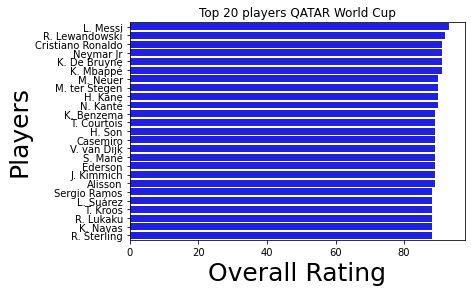

In [ ]:
# Top 25 players
Overall = FIFA22["overall"]
footballer_name = FIFA22["short_name"]

x = FIFA22['short_name'].head(25) 
y = FIFA22['overall'].head(25)

# plotting such players

ax= sns.barplot(x=y, y=x, color="#0000FF", orient='h')
plt.xlabel('Overall Rating', size=25) 
plt.ylabel('Players', size=25) 
plt.title('Top 20 players QATAR World Cup')

plt.show()

In [ ]:
# method to determine best squad
def get_best_squad(formation):
    FIFA22_copy = FIFA22.copy()
    store = []
    # for loop through each position and returns players with best rating
    for i in formation:
        store.append([
            i,
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax()]]['short_name'].to_string(index=False),
            FIFA22_copy[FIFA22_copy['Position']==i]['overall'].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax()]]['age'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax()]]['club_name'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax()]]['value_eur'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax()]]['wage_eur'].to_string(index=False)
        ])
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position']==i]['overall'].idxmax(), 
                         inplace=True)
    # returns only relevant columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'short_name', 'overall', 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [ ]:
# this is our major method determining the top 10 best team predicted outcome through current stats
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    FIFA22_copy = FIFA22.copy()
    FIFA22_copy = FIFA22_copy[FIFA22_copy['nationality_name'] == nationality]
    store = []
    for i in formation:
        store.append([
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), 
            FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])    
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax(),inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),columns = ['Position', 'short_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [ ]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            try:
                # for overall rating
                O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
                # for potential rating & corresponding value
                P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')
                summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
                count += 1
            except:
                count += 1  
    return summary

In [ ]:
# these define certain strategic positions and defensive patterns
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [ ]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [ ]:
country = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, list_2022)).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
country.set_index('nationality_name', inplace = False)
country[['overall', 'potential']] = country[['overall', 'potential']].astype(float)

In [ ]:
# fixes missed countries in the data
miss = list_2022
miss = [item if item not in country.nationality_name.values else False for item in miss]
for item in miss:
    if(type(item) == str):
        print(item)

Qatar
Tunisia


In [ ]:
# Fixing Qatar and Tunisia na's
Qatar = {'nationality_name':'Qatar', 'Squad':'4-3-3'}
Tunisia = {'nationality_name':'Tunisia', 'Squad':'4-3-3', 'overall':73.0, 'potential':76.0}
country = country.append(Qatar, ignore_index=True)
country = country.append(Tunisia, ignore_index=True)
country['overall'] = country["overall"].transform(lambda x: x.fillna(x.mean()))
country['potential'] = country["potential"].transform(lambda x: x.fillna(x.mean()))
country = country.drop(['Squad'],axis=1)
country = country.sort_values(['nationality_name','potential'],ascending=[True,False])
country_final = country.groupby('nationality_name').first().sort_values('potential', ascending=False)[0:32].reset_index() 

In [ ]:
country_top5 = country.groupby('nationality_name').first().sort_values('potential',ascending=False)[0:5].reset_index()
country_top5

,nationality_name,overall,potential
0,France,85.55,89.18
1,England,85.18,89.00
2,Spain,85.55,88.36
3,Brazil,85.64,88.09
4,Portugal,85.00,88.00


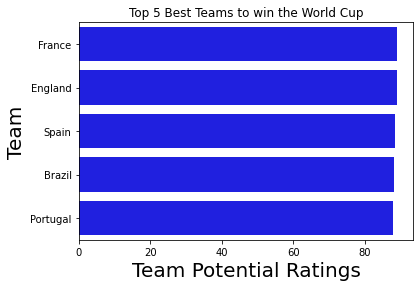

In [ ]:
# graphing the top 10 teams to win
x = country_top5['nationality_name']
y = country_top5['potential']

# plot
ax= sns.barplot(x=y, y=x, color="#0000FF", orient='h')
plt.xlabel('Team Potential Ratings', size = 20) 
plt.ylabel('Team', size = 20 ) 
plt.title('Top 5 Best Teams to win the World Cup')

plt.show()

In [ ]:
# reading the training data in
final_df = pd.read_csv('/content/drive/MyDrive/world_cup_project/world_cup_predictions.ipynb/data/training.csv')
final_df.head(10)

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
3,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
4,Sweden,Switzerland,4,3,0,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
5,Australia,Canada,52,46,1,78.0,72.0,73.0,75.0,74.0,69.0,71.0,73.0
6,Bolivia,Ecuador,59,35,1,67.0,72.0,67.0,69.0,68.0,71.0,75.0,75.0
7,Colombia,Argentina,19,5,1,78.0,81.0,79.0,81.0,78.0,83.0,88.0,85.0
8,Uruguay,Brazil,22,8,2,79.0,86.0,80.0,84.0,78.0,86.0,87.0,85.0
9,Argentina,Peru,5,70,1,81.0,69.0,83.0,88.0,84.0,71.0,77.0,74.0


In [ ]:
# I am saving the original df to a flg then I can train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [ ]:
# splitting the dataset into training/testing/validation
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=20)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=20)

In [ ]:
# taking scaling from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [ ]:
# using sklearn confusion matrix
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.55      0.60      0.57       140
           1       0.65      0.79      0.72       232
           2       0.19      0.06      0.10        95

    accuracy                           0.59       467
   macro avg       0.46      0.49      0.46       467
weighted avg       0.53      0.59      0.55       467



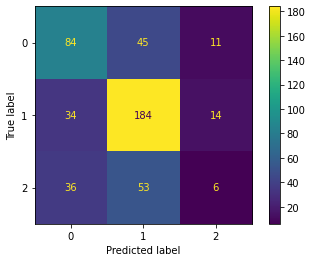

In [ ]:
# displaying randomForest
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       140
           1       0.65      0.83      0.73       232
           2       0.25      0.02      0.04        95

    accuracy                           0.61       467
   macro avg       0.48      0.50      0.45       467
weighted avg       0.54      0.61      0.55       467



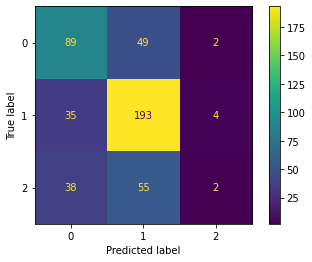

In [ ]:
# now trying adaboost
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.56      0.66      0.61       140
           1       0.67      0.84      0.75       232
           2       0.10      0.01      0.02        95

    accuracy                           0.62       467
   macro avg       0.44      0.50      0.46       467
weighted avg       0.52      0.62      0.56       467



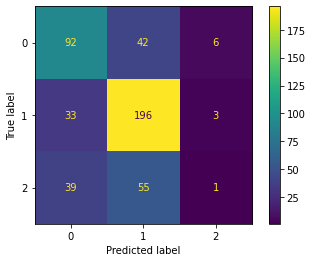

In [ ]:
# xgb boost classifier is the next method
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

In [ ]:
# going to try neural networks
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

Epoch 1/10
210/210 [==============================] - 3s 8ms/step - loss: 0.9877 - accuracy: 0.5376 - val_loss: 0.9163 - val_accuracy: 0.5846
Epoch 2/10
210/210 [==============================] - 2s 8ms/step - loss: 0.8973 - accuracy: 0.5888 - val_loss: 0.9148 - val_accuracy: 0.5834
Epoch 3/10
210/210 [==============================] - 2s 8ms/step - loss: 0.8638 - accuracy: 0.6113 - val_loss: 0.9136 - val_accuracy: 0.5822
Epoch 4/10
210/210 [==============================] - 2s 7ms/step - loss: 0.8466 - accuracy: 0.6098 - val_loss: 0.9152 - val_accuracy: 0.5745
Epoch 5/10
210/210 [==============================] - 2s 8ms/step - loss: 0.8319 - accuracy: 0.6183 - val_loss: 0.9278 - val_accuracy: 0.5864
Epoch 6/10
210/210 [==============================] - 2s 10ms/step - loss: 0.8211 - accuracy: 0.6235 - val_loss: 0.9369 - val_accuracy: 0.5787
Epoch 7/10
210/210 [==============================] - 5s 25ms/step - loss: 0.8114 - accuracy: 0.6261 - val_loss: 0.9395 - val_accuracy: 0.5810
Epoc

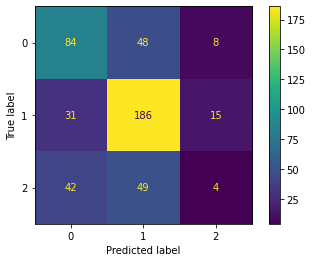

In [ ]:
# this will model 10 epochs
model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

In [ ]:
last_team_scores = pd.read_csv('/content/drive/MyDrive/world_cup_project/world_cup_predictions.ipynb/data/last_team_scores.csv')
last_team_scores.head(15)

,team,date,rank,goalkeeper_score,defense_score,offense_score,midfield_score
0,Argentina,2022-06-05,4,84.0,82.0,89.0,84.0
1,Australia,2022-06-13,42,77.0,72.0,72.0,74.0
2,Belgium,2022-06-14,2,89.0,81.0,86.0,86.0
3,Brazil,2022-06-06,1,89.0,87.0,87.0,86.0
4,Cameroon,2022-06-09,37,67.0,77.0,78.0,75.0
5,Canada,2022-06-13,38,76.0,69.0,73.0,78.0
6,Costa Rica,2022-06-14,31,88.0,72.0,70.0,69.0
7,Croatia,2022-06-13,16,82.0,78.0,77.0,84.0
8,Denmark,2022-06-13,11,85.0,80.0,78.0,80.0
9,Ecuador,2022-06-11,46,71.0,74.0,76.0,74.0


In [ ]:
squad_stats = pd.read_csv('/content/drive/MyDrive/world_cup_project/world_cup_predictions.ipynb/data/squad_stats.csv')
squad_stats.head(15)

,nationality_name,overall,potential
0,France,85.55,89.18
1,England,85.18,89.00
2,Spain,85.55,88.36
3,Brazil,85.64,88.09
4,Portugal,85.00,88.00
5,Germany,85.00,87.55
6,Netherlands,83.36,87.00
7,Argentina,83.73,86.18
8,Belgium,83.45,85.55
9,Uruguay,80.55,84.64


In [ ]:
group_matches = pd.read_csv('/content/drive/MyDrive/world_cup_project/world_cup_predictions.ipynb/data/Qatar_group_stage.csv')
round_16 = group_matches.iloc[48:56, :]
quarter_finals = group_matches.iloc[56:60, :]
semi_finals = group_matches.iloc[60:62, :]
final = group_matches.iloc[62:63, :]
second_final = group_matches.iloc[63:64, :]
group_matches = group_matches.iloc[:48, :]
group_matches.tail()

,country1,country2,group
43,Costa Rica,Germany,e
44,Ghana,Uruguay,h
45,Korea Republic,Portugal,h
46,Serbia,Switzerland,g
47,Cameroon,Brazil,g
